# EDA

- Missing Values
- Hotel Room Price distribution, skewness and sd of each variable.
- Correlations

In [83]:
#%reset

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler

### Missing Values

In [2]:
hotels = pd.read_csv('./Data/hotels_final.csv')
print(hotels.shape)

(1062, 37)


In [3]:
hotels['Index'].describe()

count    1062.000000
mean      531.023540
std       307.135966
min         0.000000
25%       265.250000
50%       531.500000
75%       796.750000
max      1062.000000
Name: Index, dtype: float64

In [4]:
pd.DataFrame(hotels.isnull().sum().sort_values(ascending=False), columns = ['Number of Null']).head(15)

,Number of Null
Pool,1000
Parking,985
Gym,814
Room_Service,665
AC,577
Internet,204
Price_Night_USD,199
Hotel_stars,106
Stars_Rating,17
Ranking_Users,16


In [5]:
#Lets drop the hotels with no Price since we won't be able to use them in our prediction modelling,
#imputing these values can be dangerous since will have a direct effect on the prediction.
hotels = hotels.dropna(axis=0, subset=['Price_Night_USD'])
hotels.shape

(863, 37)

In [6]:
hotels['Index'].describe()

count    863.000000
mean     431.426419
std      249.694949
min        0.000000
25%      215.500000
50%      431.000000
75%      647.500000
max      863.000000
Name: Index, dtype: float64

In [7]:
pd.DataFrame(hotels.isnull().sum().sort_values(ascending=False), columns = ['Number of Null']).head(10)

,Number of Null
Pool,810
Parking,800
Gym,635
Room_Service,504
AC,412
Internet,110
Hotel_stars,7
Stars_Rating,1
Ranking_Users,1
Total_Reviews,0


Changing the NaN in the amenities to 0

In [8]:
#columns to modify
amenities = hotels[['Gym', 'Pool', 'Parking','Room_Service','AC', 'Internet']].columns

#we fill all the nulls with a 0
for c in amenities:
    hotels[c] = hotels[c].fillna('0')

#Transforming the amenities to numeric
for c in amenities:
    hotels[c] = pd.to_numeric(hotels[c])
    
pd.DataFrame(hotels.isnull().sum().sort_values(ascending=False), columns = ['Number of Null']).head(6)

,Number of Null
Hotel_stars,7
Stars_Rating,1
Ranking_Users,1
Housing_Transactions,0
Latitude,0
Index,0


In [9]:
#Let's see which hotels have no stars and forth on cleaning and completing the data
hotels[hotels.Ranking_Users.isnull()]

,Average_Household_Size,Single_Households,Population_Below_14,Population_15_29,Population_30_44,Population_45_59,Purchasing_Power_Capita,Price_Night_USD,Stars_Rating,Total_Households,Total_Population,Total_Reviews,Ranking_Users,Hotel_stars,Index,Latitude,Longitude,Housing_Transactions,Median_House_Price,Airbnb_Listings,Total_Airbnb_Beds,Median_Airbnb_Price,Total_Restaurants,Total_Sum_Of_Reviews,Median_Restaurant_Ranking,Heathrow,Stansted,Gatwick,City Airport,Tourist_POIs,Business_POIs,Gym,Internet,AC,Parking,Pool,Room_Service
858,1.9,1386,771,1489,1579,1077,22132.13,223.0,NaN,2938,5623,0,NaN,4.0,859,51.492914,-0.121273,77,600000,60,180,65,38,5522,6742.315789,69,74,51,44,31.333333,25.0,1.0,1.0,1.0,0.0,0.0,1.0


In [10]:
# Finally we jsut drop the last few with na values
hotels.dropna(inplace=True)
pd.DataFrame(hotels.isnull().sum().sort_values(ascending=False), columns = ['Number of Null']).head(2)

,Number of Null
Room_Service,0
Housing_Transactions,0


## Hotels Prices EDA

In [11]:
hotels['Price_Night_USD'].isnull().sum()

0

2.379613466206186

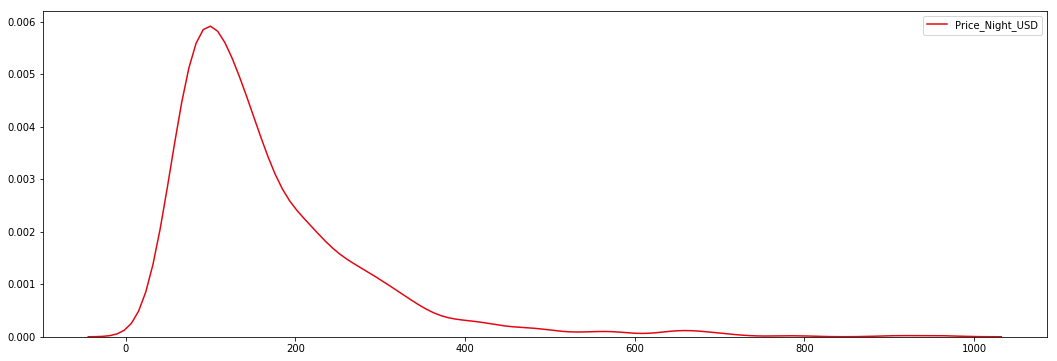

In [12]:
plt.figure(figsize=(18,6))
sns.kdeplot(hotels['Price_Night_USD'], color='#E30613')
hotels['Price_Night_USD'].skew()

**Applying Log & BoxCox Transformation**

0.4233365726086883


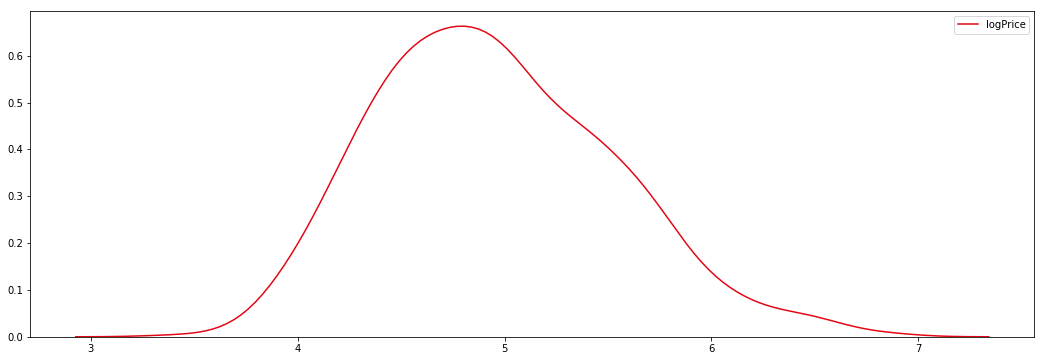

In [13]:
#Log transformation

hotels['logPrice'] = np.log1p(hotels['Price_Night_USD'])
print(hotels['logPrice'].skew())
plt.figure(figsize=(18,6))
sns.kdeplot(hotels['logPrice'], color='#E30613')

[-0.27145002]
0.020378185251849777


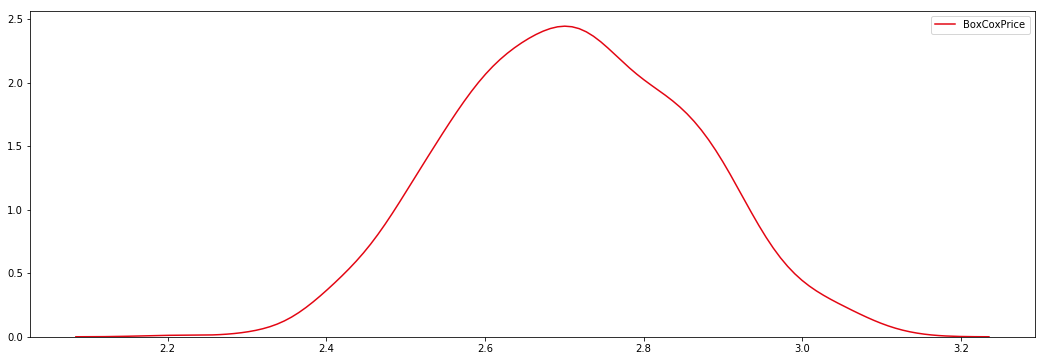

In [14]:
#Box Cox transformation
array_price = np.asarray(hotels[['Price_Night_USD']].values)

# transform values
price_boxcox = stats.boxcox(array_price)[0] #this 0 will return the array with transformed data
hotels['BoxCoxPrice'] = price_boxcox 
#For future reference we print the lambda of the BoxCox transformation, we will need this to do the inverse 
#this one will return teh lambda used to trnasoform the data, used later for inverser boxcox
lambda_boxcox = stats.boxcox(array_price)[1]
print(lambda_boxcox)

print(hotels['BoxCoxPrice'].skew())

plt.figure(figsize=(18,6))
sns.kdeplot(hotels['BoxCoxPrice'], color='#E30613')

**We will be using BoxCox since returns much better results**

In [98]:
#As per the table below we will need to address both the skewness 
#of some of the columns as well the units, so standarize the data 

stats = pd.DataFrame((hotels.skew().sort_values(ascending=False)), columns = ['Skew'])
stats['std'] = hotels.std()
stats

,Skew,std
Total_Sum_Of_Reviews,3.981367,52267.165464
Pool,3.639315,0.241275
Total_Reviews,3.331393,1588.044424
Parking,3.269321,0.261409
Total_Restaurants,2.968732,150.275391
Price_Night_USD,2.379613,116.837772
Median_House_Price,2.017771,561934.781144
Tourist_POIs,1.391973,8.052721
Average_Household_Size,1.256154,0.259132
Business_POIs,1.242717,8.331553


### Correlations

In [99]:
#we use the corr function for only the numneric features
train_corr = pd.DataFrame(hotels.drop(['Index', 'logPrice', 'BoxCoxPrice'], axis=1))
corr_matrix = train_corr.corr()
corr_matrix['Price_Night_USD'].sort_values(ascending=False)

Price_Night_USD              1.000000
Hotel_stars                  0.682545
Room_Service                 0.583750
Median_House_Price           0.560470
Median_Airbnb_Price          0.549762
Gym                          0.511585
Stars_Rating                 0.494389
Total_Restaurants            0.403812
Total_Sum_Of_Reviews         0.386563
AC                           0.365563
Pool                         0.279895
Purchasing_Power_Capita      0.217698
Internet                     0.207750
Total_Reviews                0.192368
Longitude                    0.050803
Latitude                    -0.017442
Total_Airbnb_Beds           -0.025118
Airbnb_Listings             -0.054236
Heathrow                    -0.074824
Parking                     -0.142171
City Airport                -0.207966
Median_Restaurant_Ranking   -0.228149
Housing_Transactions        -0.241050
Single_Households           -0.246741
Average_Household_Size      -0.273174
Stansted                    -0.313452
Population_4

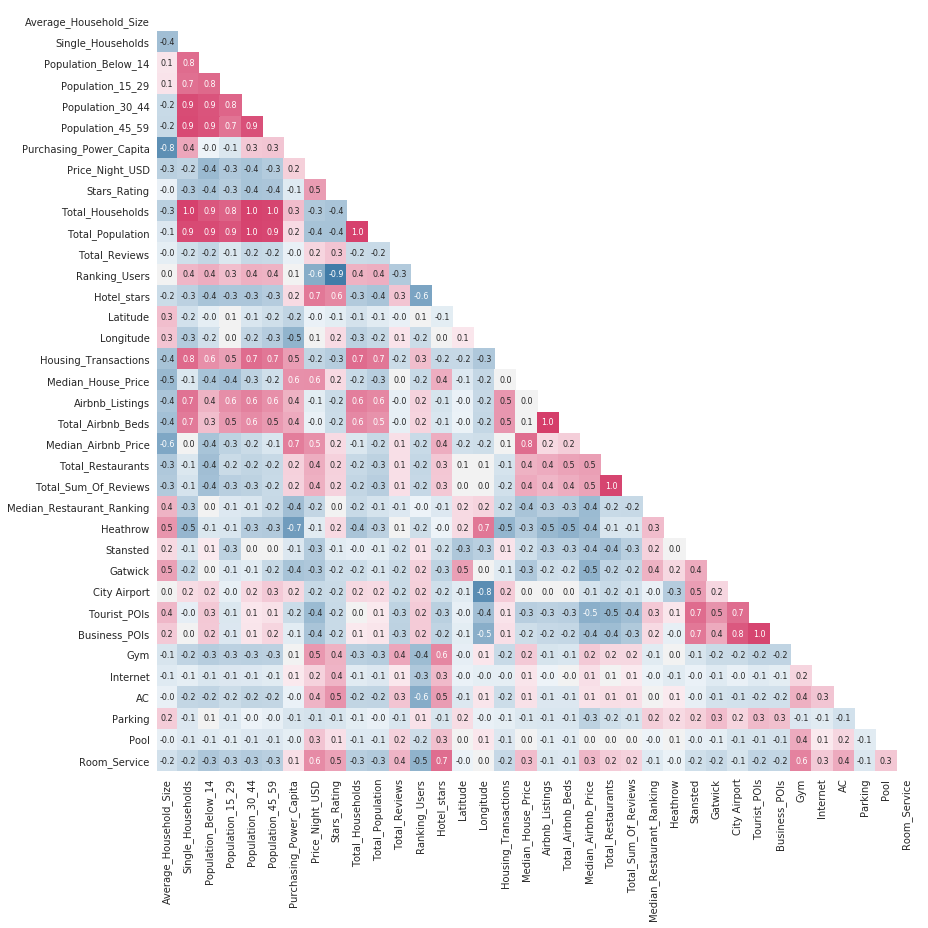

In [100]:
plt.figure(figsize=(18,14))
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(240, 0, as_cmap=True)
with sns.axes_style("white"):
    ax = sns.heatmap(corr_matrix,mask=mask, cmap=cmap, annot=True, annot_kws={"size": 8}, cbar=False, square=True,  fmt='.1f')

#Saving final plot for presentation
corr_matrix = ax.get_figure()    
corr_matrix.savefig('corr_matrix.png', dpi=600)

**Lets drop some of the columns that are heavily intercorrleated or don't add any info**

In [101]:
#Population features
hotels.drop(labels=['Population_Below_14','Population_15_29','Population_30_44','Population_45_59', 'Single_Households'], axis=1,inplace=True)

#Total households and total popualtion heavily intercorrelated
hotels.drop(labels=['Total_Households', 'Airbnb_Listings','Total_Sum_Of_Reviews', 'Stars_Rating'], axis=1,inplace=True)

Price_Night_USD              1.000000
Hotel_stars                  0.682545
Room_Service                 0.583750
Median_House_Price           0.560470
Median_Airbnb_Price          0.549762
Gym                          0.511585
Total_Restaurants            0.403812
AC                           0.365563
Pool                         0.279895
Purchasing_Power_Capita      0.217698
Internet                     0.207750
Total_Reviews                0.192368
Longitude                    0.050803
Latitude                    -0.017442
Total_Airbnb_Beds           -0.025118
Heathrow                    -0.074824
Parking                     -0.142171
City Airport                -0.207966
Median_Restaurant_Ranking   -0.228149
Housing_Transactions        -0.241050
Average_Household_Size      -0.273174
Stansted                    -0.313452
Gatwick                     -0.340834
Business_POIs               -0.367227
Total_Population            -0.380985
Tourist_POIs                -0.437887
Ranking_User

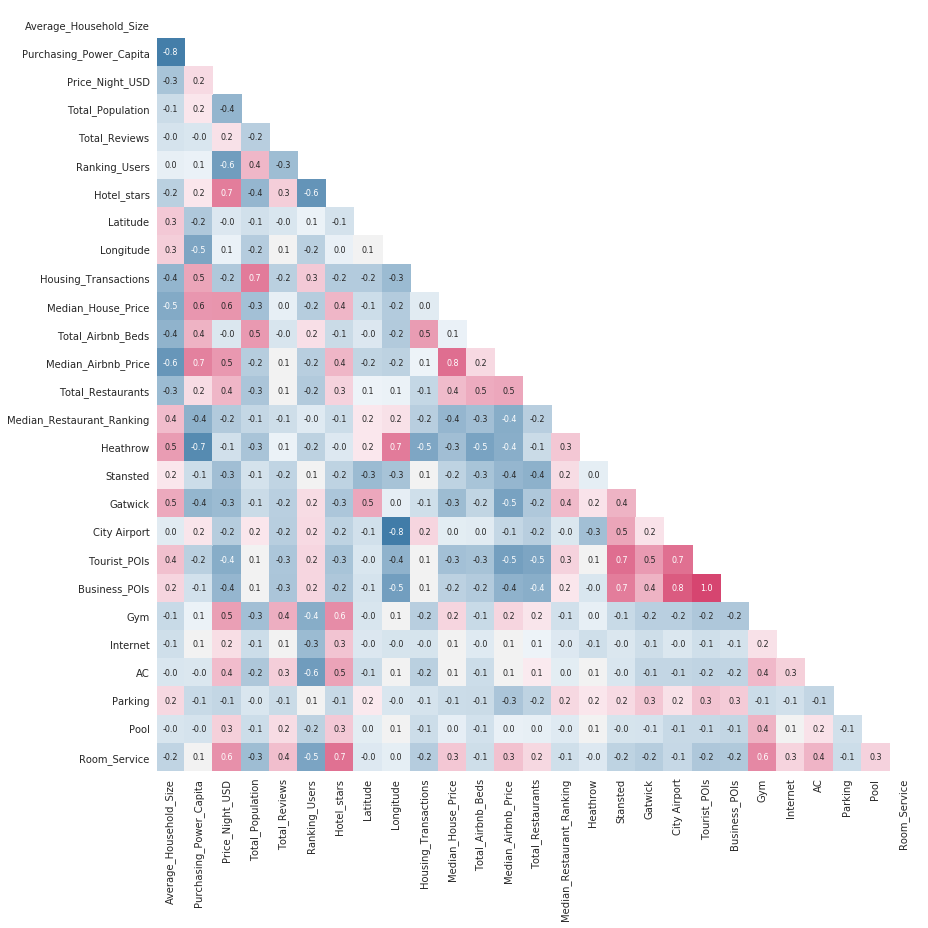

In [102]:
#Repeat the plot so we can see the differences
train_corr = pd.DataFrame(hotels.drop(['Index', 'logPrice', 'BoxCoxPrice'], axis=1))
corr_matrix = train_corr.corr()
print(corr_matrix['Price_Night_USD'].sort_values(ascending=False))

train_corr = pd.DataFrame(hotels.drop(['Index', 'logPrice', 'BoxCoxPrice'], axis=1))
corr_matrix = train_corr.corr()
corr_matrix['Price_Night_USD'].sort_values(ascending=False)

plt.figure(figsize=(18,14))
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(240, 0, as_cmap=True)
with sns.axes_style("white"):
    ax = sns.heatmap(corr_matrix,mask=mask, cmap=cmap, annot=True, annot_kws={"size": 8}, cbar=False, square=True,  fmt='.1f')

#Saving final plot for presentation
corr_matrix = ax.get_figure()    
corr_matrix.savefig('corr_matrix.png', dpi=600)

**Correlation plots**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1296x1008 with 0 Axes>

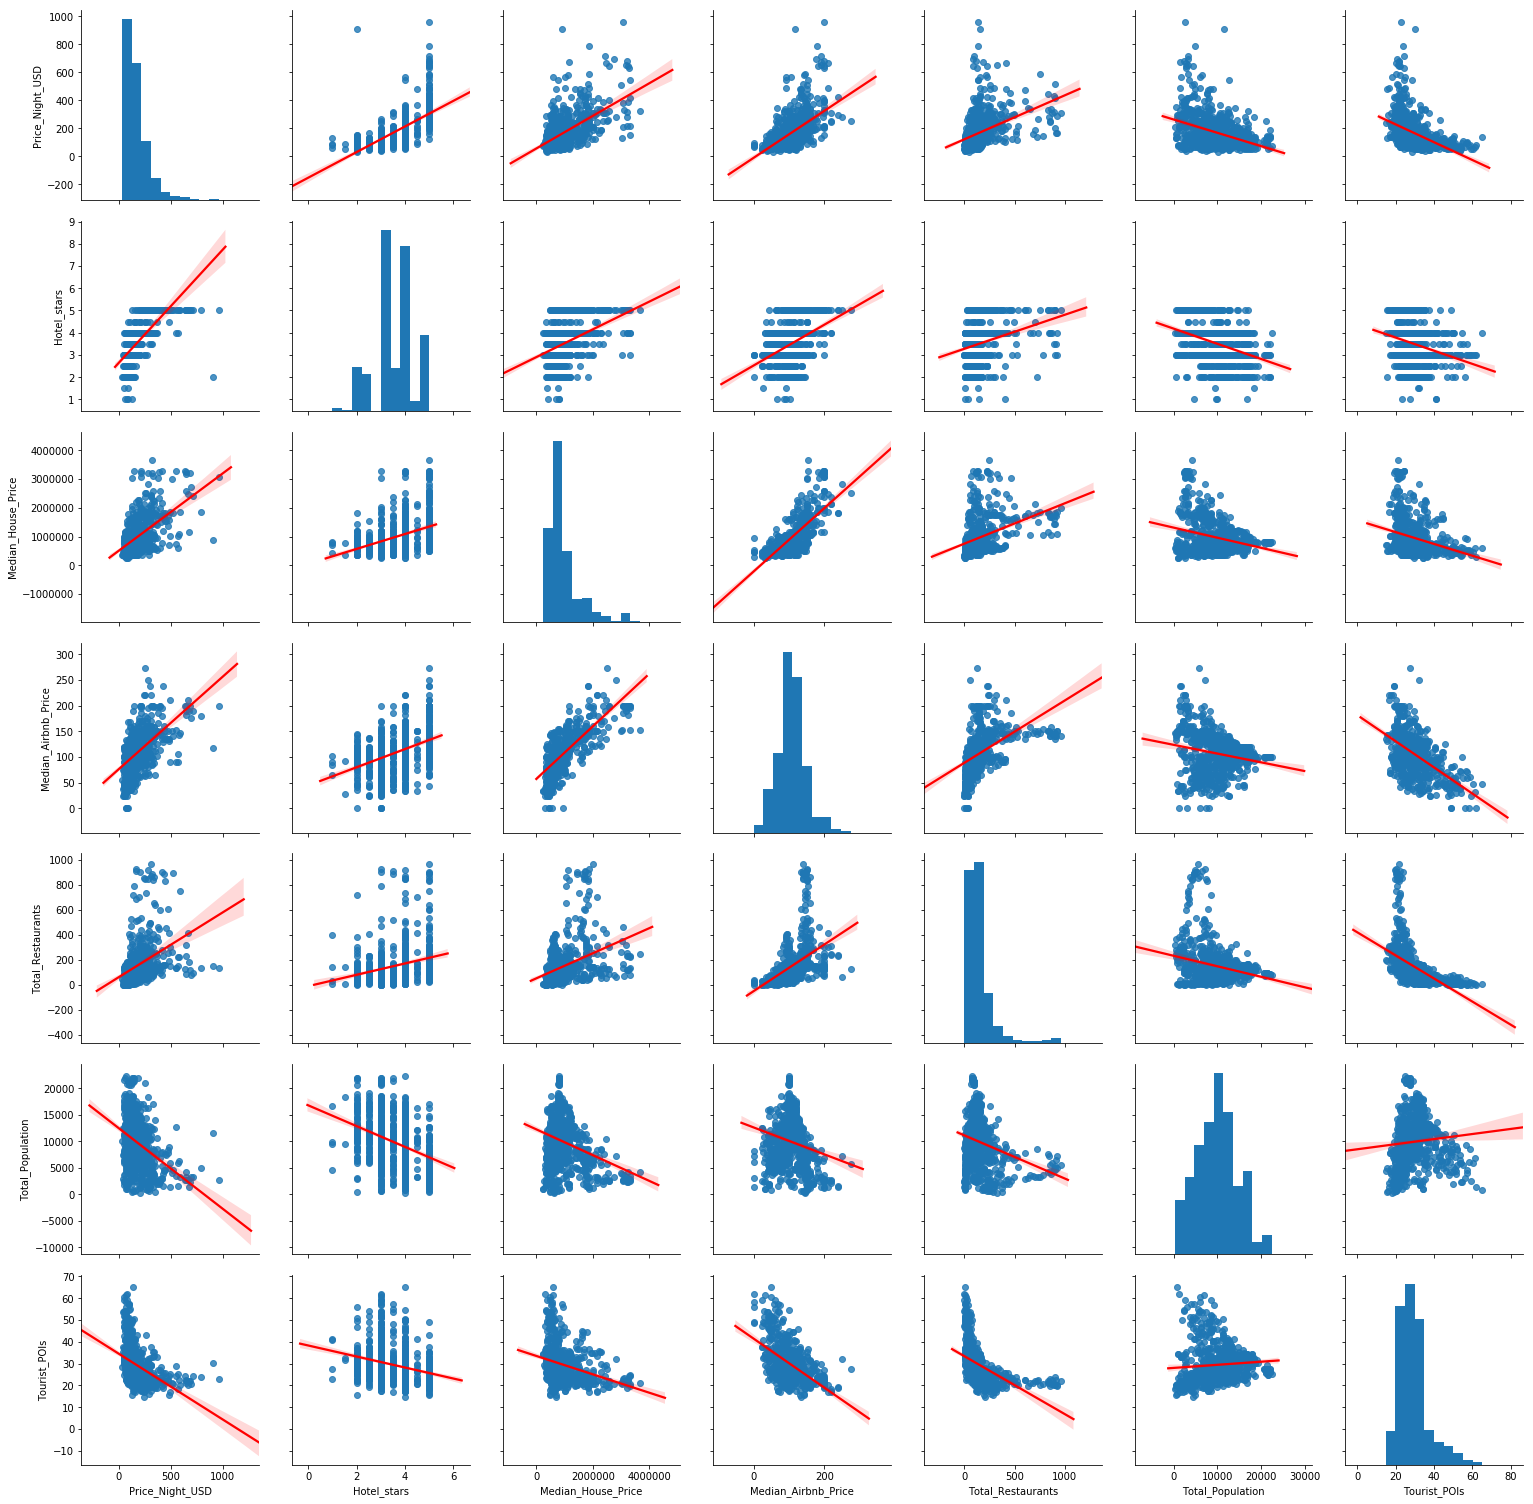

In [103]:
#We will just expore some of the columns (after the data has been treated), to see if we identify any pattern
plt.figure(figsize=(18,14))

#In case we want to limit the data we are plotting
pairplot_data = hotels[['Price_Night_USD','Hotel_stars', 'Median_House_Price', 'Median_Airbnb_Price', 
                        'Total_Restaurants','Total_Population',
                       'Tourist_POIs']]

#And we build a pairplot
ax2 =sns.pairplot(pairplot_data, kind="reg", size=3,plot_kws={'line_kws':{'color':'red'}})
ax2

## Outliers

From the scatter plot we can easily see some outlier we will need to consider. Lets first create a Boxplot of the data as well scatter plots with some of the variables.



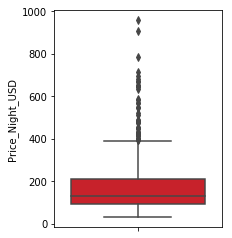

In [104]:
plt.figure(figsize=(3,4))
sns.boxplot(hotels['Price_Night_USD'],orient='v', color='#E30613')

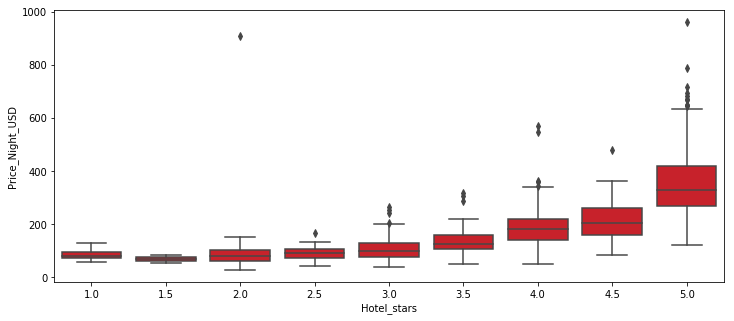

In [105]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Hotel_stars', y='Price_Night_USD', data=hotels,orient='v', color='#E30613')

We see a clear outlier in the 2 stars category that after further investigation clearly shows its incorrect. 

We will delete the five more evident outliers ot improve our model. 

So we will identify the index top two points in the 2, 4, and 5 categories and delete them.

In [106]:
#Delete the different outliers
index = []
index.extend(hotels[hotels['Hotel_stars'] == 2.0].sort_values('Price_Night_USD', ascending=False).head(1).index.values)
index.extend(hotels[hotels['Hotel_stars'] == 3.5].sort_values('Price_Night_USD', ascending=False).head(3).index.values)
index.extend(hotels[hotels['Hotel_stars'] == 4.0].sort_values('Price_Night_USD', ascending=False).head(2).index.values)
index.extend(hotels[hotels['Hotel_stars'] == 4.5].sort_values('Price_Night_USD', ascending=False).head(1).index.values)
index.extend(hotels[hotels['Hotel_stars'] == 5.0].sort_values('Price_Night_USD', ascending=False).head(2).index.values)

print(index)

[857, 340, 565, 334, 205, 647, 238, 264, 266]


We drop the specified indexes

In [107]:
hotels.drop(index, inplace=True)

In [108]:
hotels.shape

(846, 30)

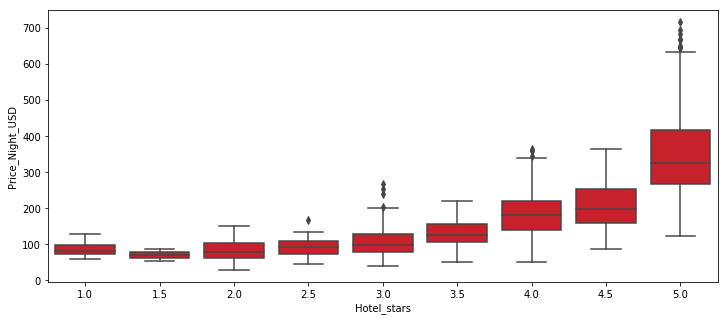

In [109]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Hotel_stars', y='Price_Night_USD', data=hotels,orient='v', color='#E30613')

## Skewness of the data and standarization

In [110]:
stats = pd.DataFrame((hotels.skew().sort_values(ascending=False)), columns = ['skew'])
stats['Std'] = hotels.std()
stats[stats['skew'] > 1]


,skew,Std
Pool,3.658163,0.240325
Total_Reviews,3.357608,1587.185937
Parking,3.280609,0.260760
Total_Restaurants,2.970632,148.613097
Median_House_Price,2.031298,550737.441275
Price_Night_USD,2.013421,106.755990
Tourist_POIs,1.382562,8.072579
Average_Household_Size,1.249390,0.259750
Business_POIs,1.230174,8.364119
Gym,1.088971,0.439564


**Dealing with skewness**

In [111]:
#lets transform the skewed variables 
skewed_columns = ['Total_Reviews','Total_Restaurants','Median_House_Price','Tourist_POIs','Business_POIs','Average_Household_Size']

#we can also use a threshold for the skewness
#skewed_columns= skew.loc[(skew.Skewness>1), ['index']].values.tolist()
skewed_columns

#And apply the log1p transformation

for col in skewed_columns:
    hotels[col] = hotels[col].apply(np.log1p)

In [112]:
#just to check
stats = pd.DataFrame((hotels.skew().sort_values(ascending=False)), columns = ['skew'])
stats['Std'] = hotels.std()
stats[stats['skew'] > 1]

,skew,Std
Pool,3.658163,0.240325
Parking,3.280609,0.260760
Price_Night_USD,2.013421,106.755990
Gym,1.088971,0.439564


**Data Standarization**

In [113]:
stats = pd.DataFrame((hotels.std().sort_values(ascending=False)), columns = ['std'])
stats[stats['std'] > 30]

,std
Purchasing_Power_Capita,11403.718934
Total_Population,4663.299255
Median_Restaurant_Ranking,1243.673512
Ranking_Users,300.322685
Total_Airbnb_Beds,280.699617
Index,249.116601
Price_Night_USD,106.755990
Housing_Transactions,47.720886
Median_Airbnb_Price,38.097434


In [114]:
#lets standarize some of the variables

standard_columns = ['Purchasing_Power_Capita','Total_Population',
                    'Median_Restaurant_Ranking','Ranking_Users','Total_Airbnb_Beds',
                    'Housing_Transactions','Median_Airbnb_Price']

# Remember that the standarization applies the following:
# Mean value subtracted, and then divided by the standard deviation of the whole dataset.
# So we save these values in case we want to undo the transformation at a later stage 

parameters_scaler = pd.DataFrame()
values = pd.DataFrame()

#And apply the standarization transformation
for col in standard_columns:
    values = pd.DataFrame([hotels[[col]].mean(),hotels[[col]].std()])
    parameters_scaler = pd.concat([parameters_scaler,values], axis=1)
    hotels[col] = StandardScaler().fit_transform(hotels[[col]]) #apply the transformation

parameters_scaler = parameters_scaler.set_index([['Mean','Sd']])
    
#to check
hotels.std().sort_values(ascending=False).head(10)

Index                        249.116601
Price_Night_USD              106.755990
Heathrow                      16.364608
City Airport                  11.190720
Stansted                      10.205707
Gatwick                        9.742951
Total_Reviews                  1.183158
Total_Restaurants              1.042260
Median_Restaurant_Ranking      1.000592
Total_Population               1.000592
dtype: float64

**Exporting the final dataset**

In [115]:
hotels.to_csv('./Data/hotels_for_modelling.csv')
parameters_scaler.to_csv(('./Data/Clustering/parameters_scaler.csv'))